## Ejercicio Integrador primera parte
#### Delitos En la Ciudad de Buenos Aires
##### Este trabajo trata de analizar la problematica con las herramientas vistas en el curso

!["Imagen de Buenos Aires"](https://www.buenosaires.gob.ar/sites/gcaba/files/field/image/20190218_9dejulio_dji_0388_2.jpg "Ciudad de Buenos Aires")

In [3]:
#Importamos los modulos que utilizaremos
import numpy as np
import pandas as pd    
import matplotlib.pyplot as plt 

In [4]:
df = pd.read_csv('delitos2019.csv')

#### Lo primero es averiguar qué tipos dedatos e información tenemos en el Dataframe  

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117661 entries, 0 to 117660
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   117661 non-null  int64  
 1   fecha                117661 non-null  object 
 2   franja_horaria       117661 non-null  object 
 3   tipo_delito          117661 non-null  object 
 4   subtipo_delito       11676 non-null   object 
 5   cantidad_registrada  117661 non-null  float64
 6   comuna               117064 non-null  float64
 7   barrio               117064 non-null  object 
 8   lat                  117064 non-null  float64
 9   long                 117064 non-null  float64
 10  mes                  117661 non-null  int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 9.9+ MB


#### Cantidad de delitos totales denunciados durante 2019

In [18]:
df['cantidad_registrada'].count()

117661

#### Top 5 de barrios con más delitos

In [21]:
df["barrio"].value_counts().head(5)

Palermo        9559
Balvanera      9239
San Nicolás    6246
Recoleta       5589
Flores         5518
Name: barrio, dtype: int64

#### El top 5 de barrios con menos delitos

In [23]:
df["barrio"].value_counts(ascending=True).head(5)

Puerto Madero    283
Villa Real       343
Versalles        392
Agronomía        454
Coghlan          476
Name: barrio, dtype: int64

#### El horario (franja horaria) ordenado de forma descendente desde el peor horario al menos problemático

In [27]:

df["franja_horaria"].value_counts()

18     7415
19     7224
20     6990
17     6612
16     6518
14     6458
12     6407
21     6337
15     6315
13     6044
10     5536
11     5527
22     5449
8      5122
9      4931
23     4500
7      3897
0      3073
6      2998
1      2445
5      2357
2      1965
4      1814
3      1719
S/D       8
Name: franja_horaria, dtype: int64

In [9]:
df

,id,fecha,franja_horaria,tipo_delito,subtipo_delito,cantidad_registrada,comuna,barrio,lat,long
0,374556,2019-01-01,12,Lesiones,Siniestro Vial,1.0,4.0,Nueva Pompeya,-34.648387,-58.404748
1,426152,2019-01-01,6,Robo (con violencia),NaN,1.0,9.0,Liniers,-34.649827,-58.513859
2,371604,2019-01-01,8,Lesiones,Siniestro Vial,1.0,15.0,Chacarita,-34.588108,-58.439392
3,425359,2019-01-01,16,Hurto (sin violencia),Hurto Automotor,1.0,10.0,Floresta,-34.631877,-58.483975
4,437571,2019-01-01,2,Robo (con violencia),Robo Automotor,1.0,4.0,Parque Patricios,-34.633161,-58.397123
...,...,...,...,...,...,...,...,...,...,...
117656,486770,2019-12-31,18,Robo (con violencia),Robo Automotor,1.0,8.0,Villa Riachuelo,-34.692347,-58.472299
117657,486678,2019-12-31,4,Robo (con violencia),Robo Automotor,1.0,5.0,Boedo,-34.626424,-58.422846
117658,486668,2019-12-31,1,Robo (con violencia),Robo Automotor,1.0,1.0,Monserrat,-34.615892,-58.370573
117659,486750,2019-12-31,14,Robo (con violencia),Robo Automotor,1.0,15.0,Villa Crespo,-34.602577,-58.433145


#### El día con mayor cantidad de delitos de todo el 2019 (usando groupby).

In [5]:
df.groupby("fecha")["cantidad_registrada"].sum().idxmax()

'2019-03-11'

#### Usar un gráfico de barras para mostrar el top 5 de barrios más peligrosos.

<AxesSubplot: >

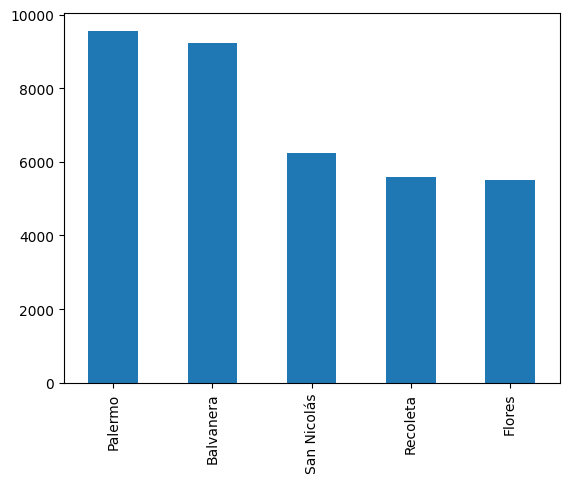

In [6]:
df["barrio"].value_counts().head().plot.bar()

#### Usar un gráfico de barras mostrar el top 5 de barrios más seguros.

<AxesSubplot: >

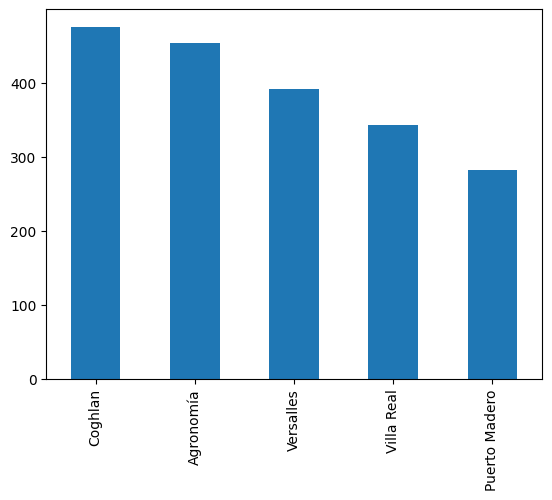

In [11]:
df["barrio"].value_counts().tail().plot.bar()

#### Crear una nueva columna llamada “mes”,y basarse en ella para averiguar cuál es el mes más inseguro.

In [16]:
df["mes"] = pd.to_datetime(df["fecha"]).dt.month
df.groupby("mes")["cantidad_registrada"].sum().idxmax() 

3

##### Para finalizar hacer un gráfico de torta de “tipo de delito”, ¿cuál es el que más frecuente según el gráfico?

<AxesSubplot: ylabel='tipo_delito'>

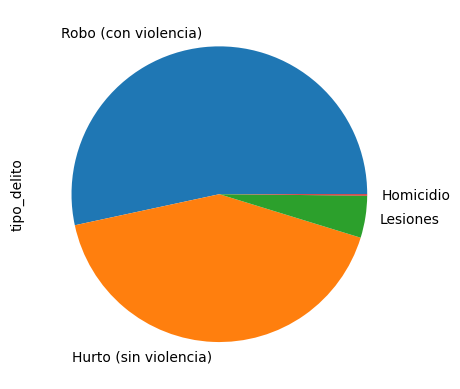

In [17]:
df["tipo_delito"].value_counts().plot.pie()

### Concluciones:
Podemos concluir que sabemos según la información aspectos delictivos que sucedieron en la ciudad de Buenos Aires durante el 2019. 

El análisis de datos es un proceso que consiste en inspeccionar, limpiar y transformar datos con el objetivo de resaltar información útil, para sugerir conclusiones y apoyo en la toma de decisiones. El análisis de datos tiene múltiples facetas y enfoques, que abarca diversas técnicas, y esta presente en diferentes negocios, la ciencia, y los dominios de las ciencias sociales. Los datos se coleccionan y analizan para indagar cuestiones, probar conjeturas o refutar teorías.